 Starting multi-vehicle detection...


0: 448x640 15 cars, 1 bus, 1 truck, 51.3ms
Speed: 4.5ms preprocess, 51.3ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)
 Lane 1 (Desktop/ai project online/lane11.jpg):
   → Cars: 15
   → Motorcycles: 0
   → Trucks: 1
   → Buss: 1



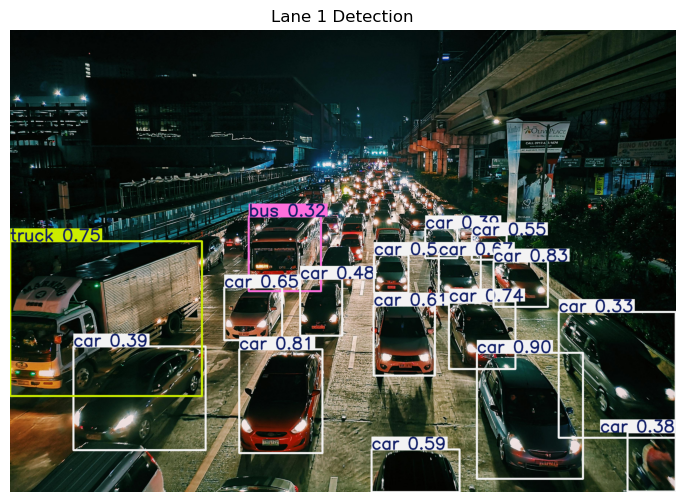


0: 640x640 13 cars, 1 truck, 84.5ms
Speed: 2.4ms preprocess, 84.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
 Lane 2 (Desktop/ai project online/lane2.jpg):
   → Cars: 13
   → Motorcycles: 0
   → Trucks: 1
   → Buss: 0



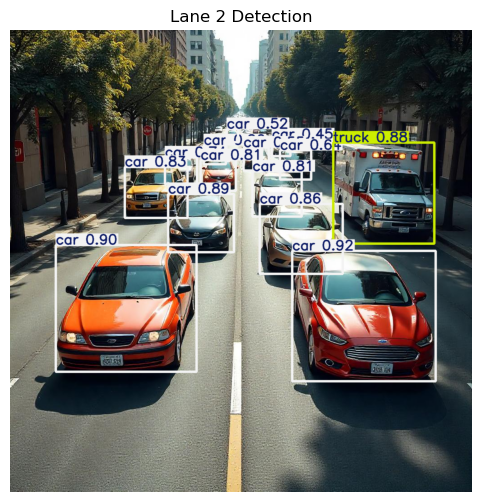


0: 640x640 10 persons, 12 cars, 4 motorcycles, 1 truck, 96.1ms
Speed: 2.3ms preprocess, 96.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
 Lane 3 (Desktop/ai project online/lane3.jpg):
   → Cars: 12
   → Motorcycles: 4
   → Trucks: 1
   → Buss: 0



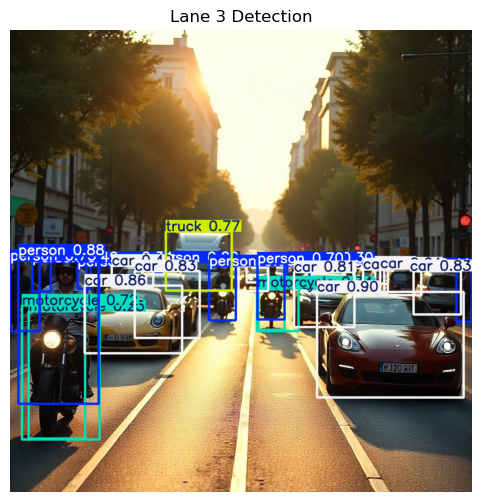


0: 480x640 7 persons, 7 cars, 5 motorcycles, 59.8ms
Speed: 1.8ms preprocess, 59.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
 Lane 4 (Desktop/ai project online/lane4.jpg):
   → Cars: 7
   → Motorcycles: 5
   → Trucks: 0
   → Buss: 0



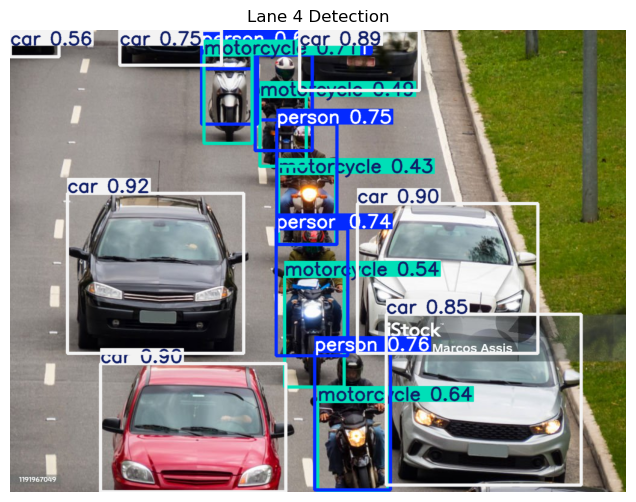

✅ Vehicle detection complete.

0: 448x640 15 cars, 1 bus, 1 truck, 57.1ms
Speed: 3.1ms preprocess, 57.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 640x640 13 cars, 1 truck, 64.2ms
Speed: 2.5ms preprocess, 64.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 persons, 12 cars, 4 motorcycles, 1 truck, 64.3ms
Speed: 2.7ms preprocess, 64.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 7 persons, 7 cars, 5 motorcycles, 48.9ms
Speed: 1.8ms preprocess, 48.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

🕒 Suggested Green Light Timings and Order:
1. 🚗 Lane 4 → 12 vehicles → Green Light: 12 sec
2. 🚗 Lane 2 → 14 vehicles → Green Light: 14 sec
3. 🚗 Lane 1 → 17 vehicles → Green Light: 17 sec
4. 🚗 Lane 3 → 17 vehicles → Green Light: 17 sec

 Suggested Traffic Light Sequence (based on least traffic first):
→ Lane 4: 12 sec
   ⏳ 3 sec cooldown...

→ Lane 2: 14 sec
   ⏳ 3 sec cooldown...


In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load YOLO model
model = YOLO("yolov8n.pt")

# Image paths
lane_images = [
    "Desktop/ai project online/lane11.jpg",
    "Desktop/ai project online/lane2.jpg",
    "Desktop/ai project online/lane3.jpg",
    "Desktop/ai project online/lane4.jpg"
]

# Labels we want to count
vehicle_labels = ["car", "motorcycle", "truck", "bus"]

print(" Starting multi-vehicle detection...\n")

# Loop through each image
for idx, img_path in enumerate(lane_images):
    img = cv2.imread(img_path)

    if img is None:
        print(f"❌ Failed to load: {img_path}")
        continue

    results = model(img)
    detected_counts = {label: 0 for label in vehicle_labels}

    # Count each vehicle type
    for box in results[0].boxes:
        cls_id = int(box.cls)
        label = results[0].names[cls_id]
        if label in detected_counts:
            detected_counts[label] += 1

    print(f" Lane {idx+1} ({img_path}):")
    for label in vehicle_labels:
        print(f"   → {label.capitalize()}s: {detected_counts[label]}")
    print()

    # Show YOLO-annotated image using matplotlib
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.title(f"Lane {idx+1} Detection")
    plt.show()

print("✅ Vehicle detection complete.")
import math

# Store total vehicle counts per lane
lane_vehicle_counts = []

# Calculate total vehicles per lane
for idx, img_path in enumerate(lane_images):
    img = cv2.imread(img_path)

    if img is None:
        lane_vehicle_counts.append(float('inf'))  # Assign high value to skip invalid
        continue

    results = model(img)
    count = 0
    for box in results[0].boxes:
        cls_id = int(box.cls)
        label = results[0].names[cls_id]
        if label in vehicle_labels:
            count += 1
    lane_vehicle_counts.append(count)

# Create lane timing information
lane_timings = []

for lane_idx, vehicle_count in enumerate(lane_vehicle_counts):
    # Assume 1 second per vehicle, but cap at 60s
    green_time = min(vehicle_count, 60)

    # Add a 3-second cooldown buffer
    green_time = max(green_time, 3)

    lane_timings.append({
        'lane': lane_idx + 1,
        'vehicles': vehicle_count,
        'green_light_time': green_time
    })

# Sort by least vehicles to prioritize low-traffic lanes first
lane_timings_sorted = sorted(lane_timings, key=lambda x: x['vehicles'])

print("\n🕒 Suggested Green Light Timings and Order:")
for i, lane in enumerate(lane_timings_sorted):
    print(f"{i+1}. 🚗 Lane {lane['lane']} → {lane['vehicles']} vehicles → Green Light: {lane['green_light_time']} sec")

print("\n Suggested Traffic Light Sequence (based on least traffic first):")
for lane in lane_timings_sorted:
    print(f"→ Lane {lane['lane']}: {lane['green_light_time']} sec")
    print("   ⏳ 3 sec cooldown...\n")
















🚦 Starting multi-vehicle detection with weighted priority...


0: 448x640 15 cars, 1 bus, 1 truck, 94.1ms
Speed: 13.4ms preprocess, 94.1ms inference, 11.9ms postprocess per image at shape (1, 3, 448, 640)
📷 Lane 1 (Desktop/ai project online/lane11.jpg):
   → Cars: 15 (x1.5)
   → Motorcycles: 0 (x1)
   → Trucks: 1 (x2)
   → Buss: 1 (x3)
   ➕ Weighted Total: 27.5



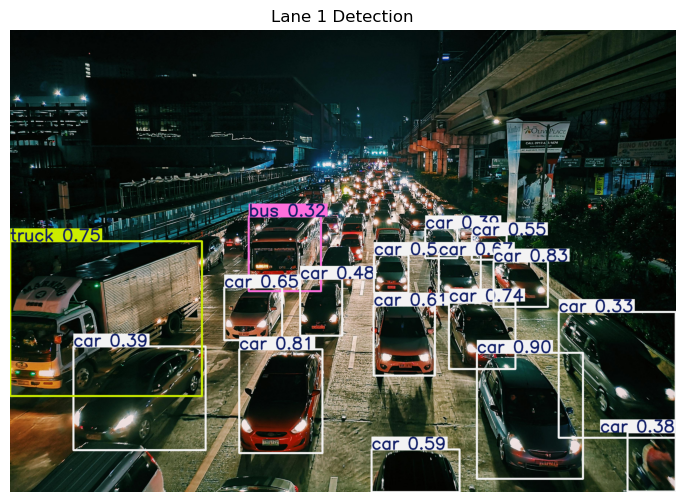


0: 640x640 13 cars, 1 truck, 72.1ms
Speed: 2.6ms preprocess, 72.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
📷 Lane 2 (Desktop/ai project online/lane2.jpg):
   → Cars: 13 (x1.5)
   → Motorcycles: 0 (x1)
   → Trucks: 1 (x2)
   → Buss: 0 (x3)
   ➕ Weighted Total: 21.5



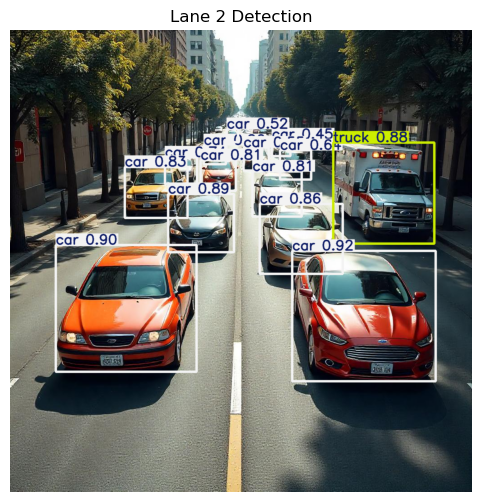


0: 640x640 10 persons, 12 cars, 4 motorcycles, 1 truck, 84.8ms
Speed: 2.6ms preprocess, 84.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
📷 Lane 3 (Desktop/ai project online/lane3.jpg):
   → Cars: 12 (x1.5)
   → Motorcycles: 4 (x1)
   → Trucks: 1 (x2)
   → Buss: 0 (x3)
   ➕ Weighted Total: 24.0



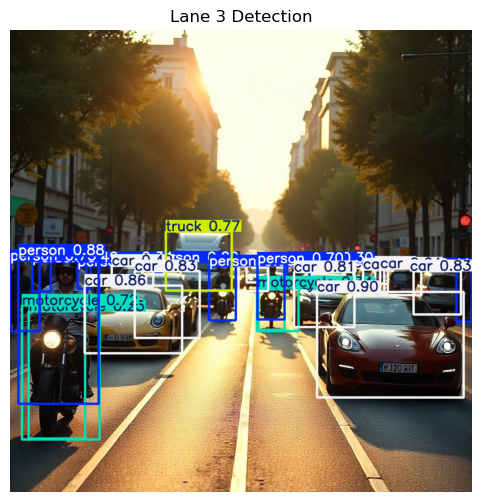


0: 480x640 7 persons, 7 cars, 5 motorcycles, 70.8ms
Speed: 1.5ms preprocess, 70.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
📷 Lane 4 (Desktop/ai project online/lane4.jpg):
   → Cars: 7 (x1.5)
   → Motorcycles: 5 (x1)
   → Trucks: 0 (x2)
   → Buss: 0 (x3)
   ➕ Weighted Total: 15.5



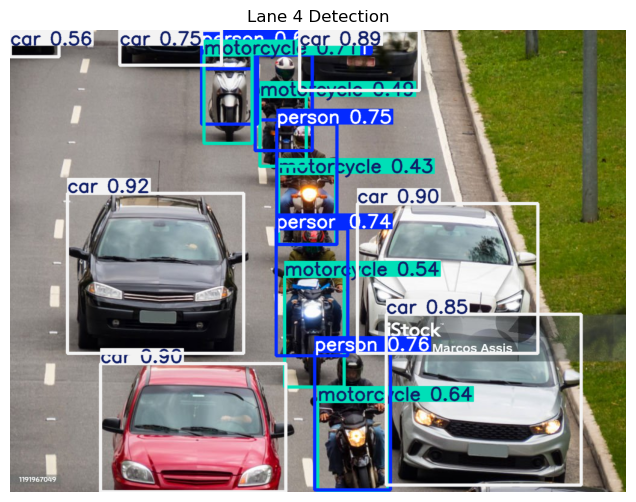

✅ Detection complete.

🟢 Final Green Light Allocation Based on Weighted Priority:

1. 🚦 Lane 1:
   ➤ Weighted Total: 27.5
   ⏱️ Green Light Time: 55 seconds

2. 🚦 Lane 3:
   ➤ Weighted Total: 24.0
   ⏱️ Green Light Time: 48 seconds

3. 🚦 Lane 2:
   ➤ Weighted Total: 21.5
   ⏱️ Green Light Time: 43 seconds

4. 🚦 Lane 4:
   ➤ Weighted Total: 15.5
   ⏱️ Green Light Time: 31 seconds



In [6]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

# Load YOLO model
model = YOLO("yolov8n.pt")

# Image paths
lane_images = [
    "Desktop/ai project online/lane11.jpg",
    "Desktop/ai project online/lane2.jpg",
    "Desktop/ai project online/lane3.jpg",
    "Desktop/ai project online/lane4.jpg"
]

# Labels we want to count
vehicle_labels = ["car", "motorcycle", "truck", "bus"]

# Assign weights to each vehicle type
vehicle_weights = {
    "motorcycle": 1,
    "car": 1.5,
    "truck": 2,
    "bus": 3
}

print("🚦 Starting multi-vehicle detection with weighted priority...\n")

# Store lane weights and annotated results
lane_weighted_totals = []
annotated_results = []

# Loop through each lane image
for idx, img_path in enumerate(lane_images):
    img = cv2.imread(img_path)

    if img is None:
        print(f"❌ Failed to load: {img_path}")
        lane_weighted_totals.append({
            "lane": idx + 1,
            "total_weight": float('inf'),
            "details": {}
        })
        annotated_results.append(None)
        continue

    results = model(img)
    weighted_total = 0
    counts = {label: 0 for label in vehicle_labels}

    for box in results[0].boxes:
        cls_id = int(box.cls)
        label = results[0].names[cls_id]
        if label in vehicle_labels:
            counts[label] += 1
            weighted_total += vehicle_weights[label]

    # Store lane data
    lane_weighted_totals.append({
        "lane": idx + 1,
        "total_weight": weighted_total,
        "details": counts
    })

    # Save annotated image
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    annotated_results.append(annotated_img)

    # Print detection summary
    print(f"📷 Lane {idx+1} ({img_path}):")
    for label in vehicle_labels:
        print(f"   → {label.capitalize()}s: {counts[label]} (x{vehicle_weights[label]})")
    print(f"   ➕ Weighted Total: {weighted_total}\n")

    # Show image
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.title(f"Lane {idx+1} Detection")
    plt.show()

# Sort lanes by weighted total (highest traffic goes first)
lane_priority = sorted(lane_weighted_totals, key=lambda x: x['total_weight'], reverse=True)

print("✅ Detection complete.\n")

# Display final green light allocation
print("🟢 Final Green Light Allocation Based on Weighted Priority:\n")
for i, lane in enumerate(lane_priority):
    time_alloc = max(min(int(lane['total_weight'] * 2), 60), 10)  # Min 10s, Max 60s
    print(f"{i+1}. 🚦 Lane {lane['lane']}:")
    print(f"   ➤ Weighted Total: {lane['total_weight']}")
    print(f"   ⏱️ Green Light Time: {time_alloc} seconds\n")
